# [파일 합치기](https://www.acmicpc.net/problem/11066)

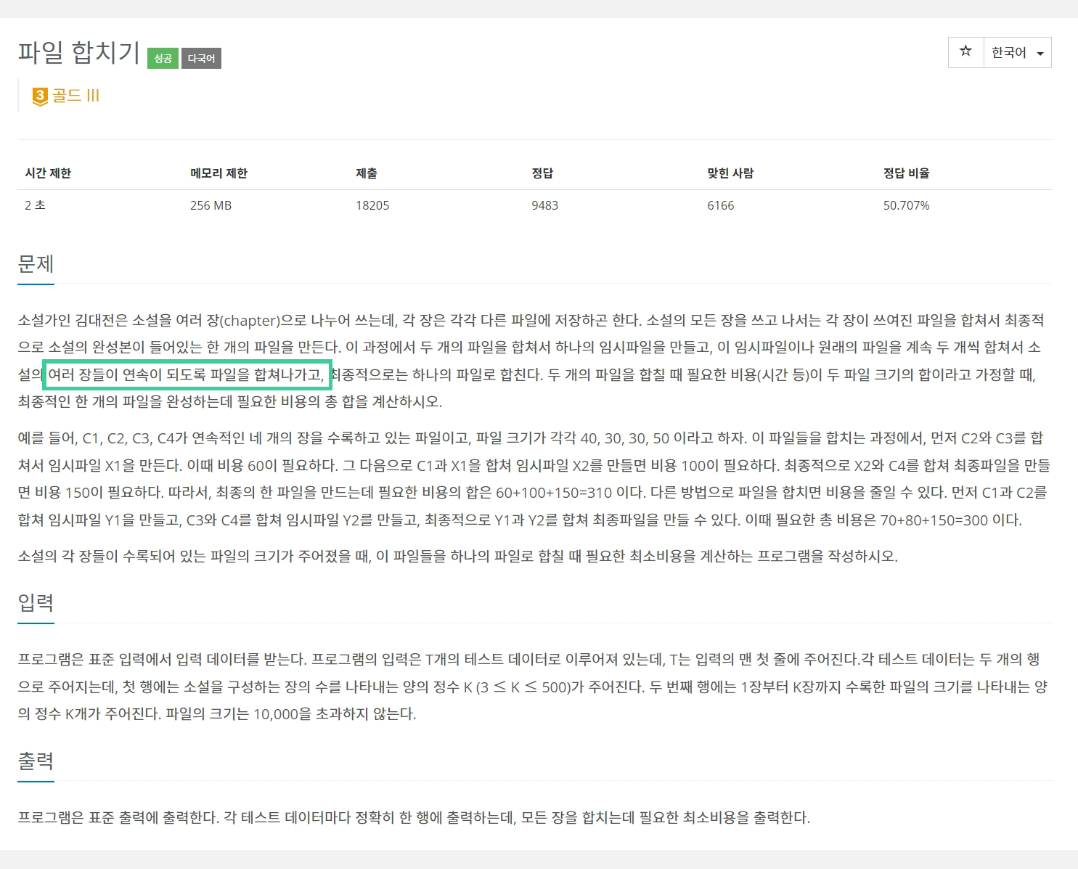

## [질문 검색 참고](https://www.acmicpc.net/board/view/31312)

<!-- ![](image/11066.png) -->

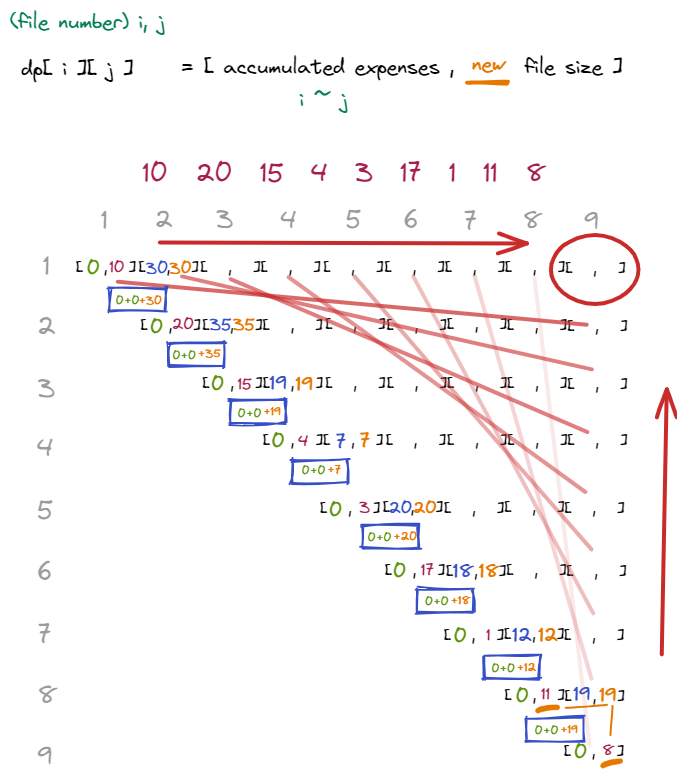

# 조건 
## -  파일은 연속으로만 합칠 수 있다. 
## -  비용은 파일을 합친 크기만큼 누적된다.
## -  최소 비용을 구해야 한다.

In [ ]:
import sys

input = sys.stdin.readline

t = int(input())

for _ in range(t):
    n = int(input())
    arr = list(map(int, input().rstrip().split()))
    dp = [[[0, 0] for _ in range(n)] for _ in range(n)]
    # dp[i][j] = [ 비용 , i부터 j까지 처리한 파일 크기 ]
    
    for i in range(n):
        dp[i][i] = [0, arr[i]]  # i부터 i까지의 합산 비용은 0, 파일 크기는 arr[i]

    for i in range(n-2, -1, -1):
        for j in range(i+1, n):
            dp[i][j][1] = dp[i][i][1] + dp[i+1][j][1]  # 파일 크기 합
            dp[i][j][0] = dp[i][i][0] + dp[i+1][j][0]  # 비용 일부 갱신 = 두 파일이 각각 가지고 있었던 비용
            for k in range(i+1, j):
                dp[i][j][0] = min(dp[i][j][0], dp[i][k][0]+dp[k+1][j][0])
            dp[i][j][0] += dp[i][j][1]  # 비용 최종 갱신 ← 두 파일을 하나로 합치는 비용 합산

    print(dp[0][n-1][0])